<StemContainer object of 3 artists>

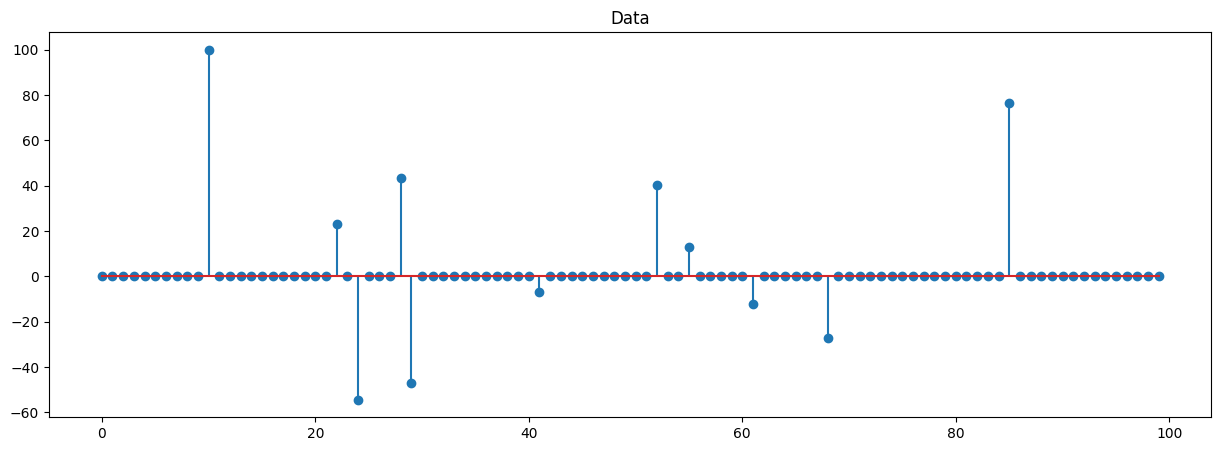

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200289 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


min of data -54.39718947118328 max of data 100.0
No. of non-zero elements in signal: 11
No. of non-zero elements in min-max-scaled: 99


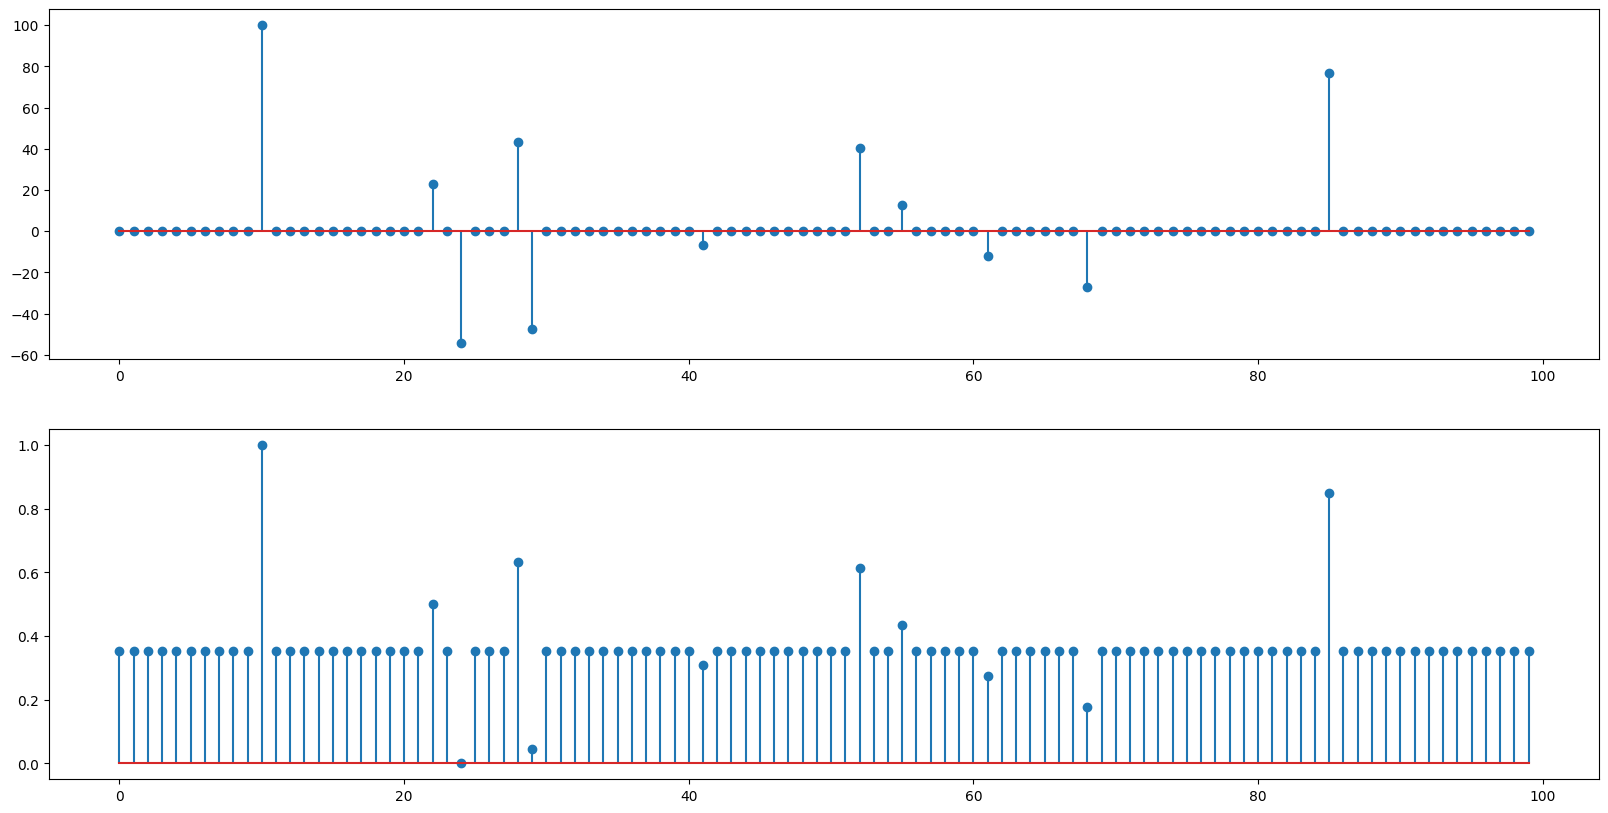

In [2]:
# Min Max scaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)
f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(scaled_data_min_max)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (scaled_data_min_max[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in min-max-scaled:", count_normalized)

No. of non-zero elements in signal: 11
No. of non-zero elements in MaxAbsscaled data: 11


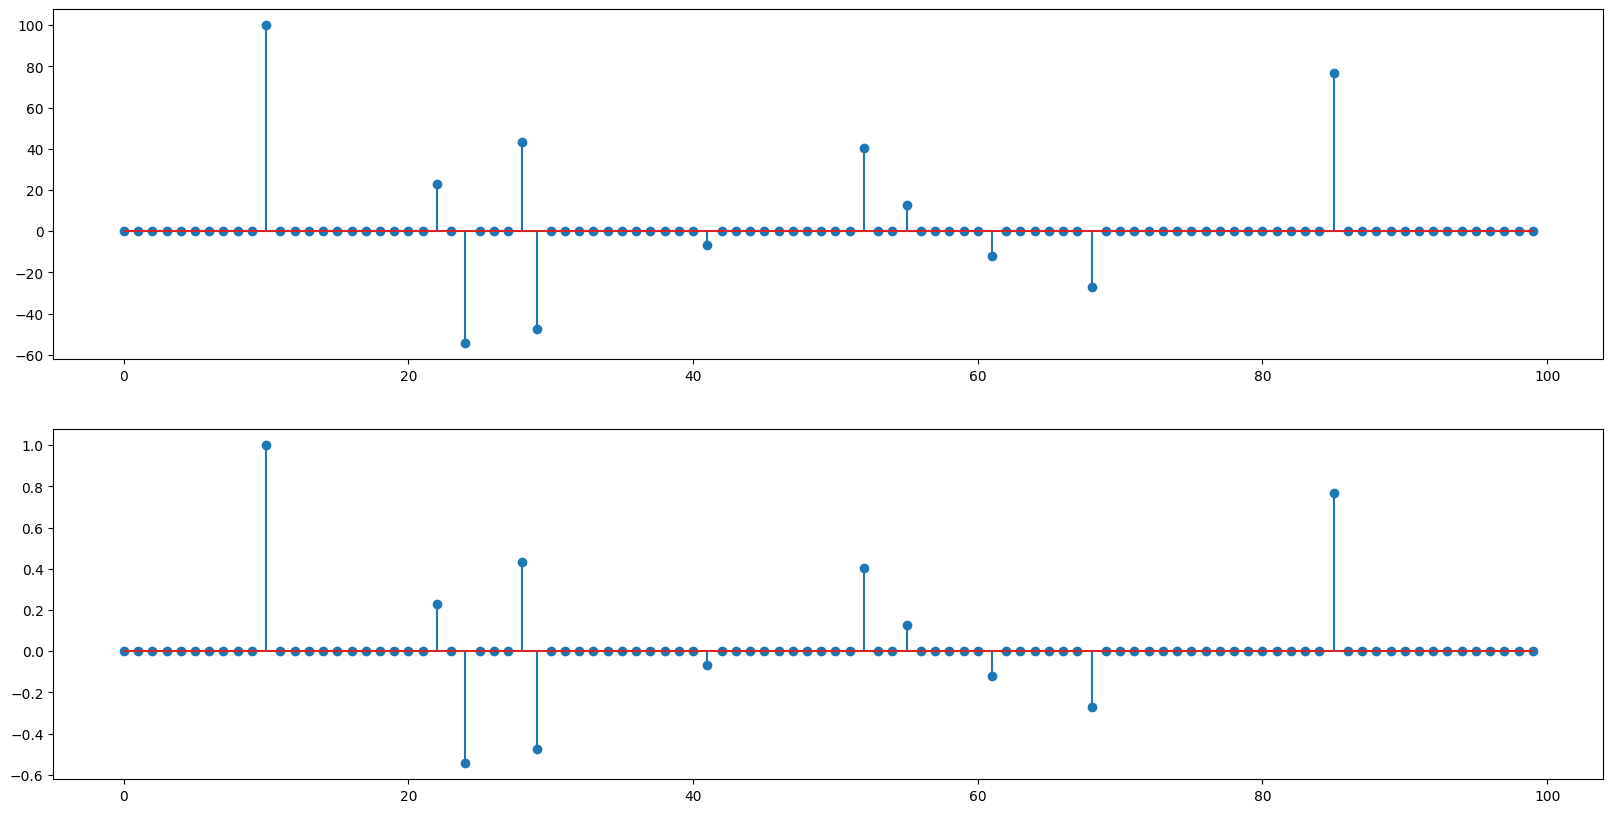

In [13]:
# MaxAbsScaler
import sklearn
from sklearn import preprocessing

max_scaled = preprocessing.MaxAbsScaler().fit_transform(signal)
#max_scaled = max_scaled.transform(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(max_scaled)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (max_scaled[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in MaxAbsscaled data:", count_normalized)

No. of non-zero elements in signal: 11
No. of non-zero elements in standard normalized data: 100


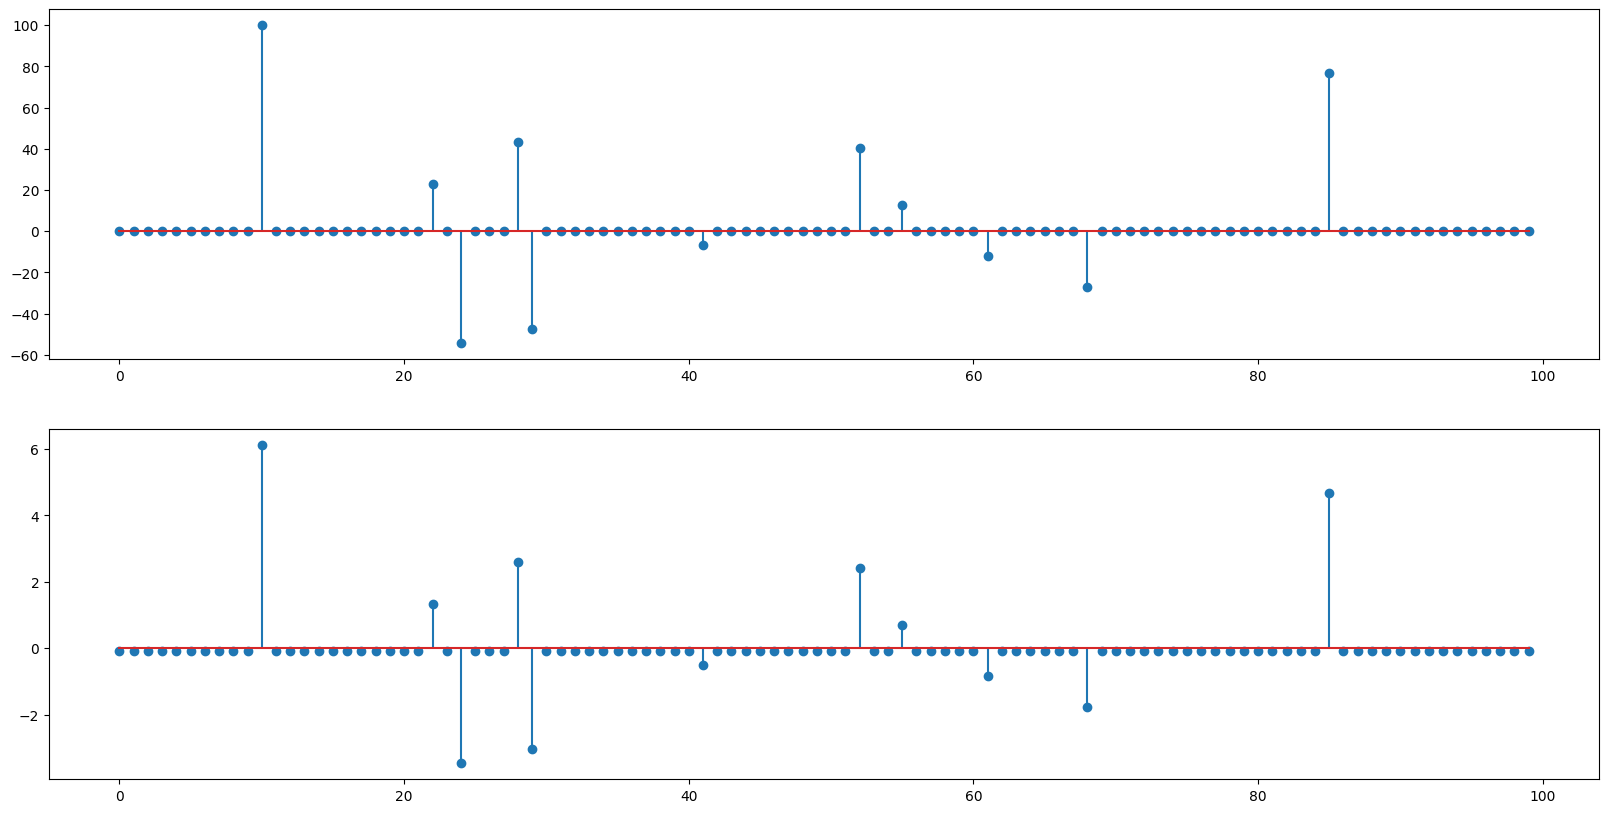

In [4]:
# Standard normalization 
def standard_normalization(data):
    mean = np.mean(data)
    stan_deviation = np.std(data)
    x_normalized = (data - mean)/stan_deviation
    return x_normalized

standard_normalized_data = standard_normalization(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(standard_normalized_data)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (standard_normalized_data[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in standard normalized data:", count_normalized)

In [15]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
print(df.head())
print()

X = df.iloc[:,1:4]
print(X.head())
print()

y = df.iloc[:,4]
print(y.head())
print()

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64



In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
coef_tv = model.coef_[0]
coef_radio = model.coef_[1]
coef_newspaper = model.coef_[2]
print("Intercept:",model.intercept_)

# Print the coefficients
print("Coefficient for TV:", coef_tv)
print("Coefficient for Radio:", coef_radio)
print("Coefficient for Newspaper:", coef_newspaper)

Intercept: 2.979067338122629
Coefficient for TV: 0.044729517468716326
Coefficient for Radio: 0.18919505423437652
Coefficient for Newspaper: 0.0027611143413671935


In [8]:
from scipy.stats import sem
# Making prediction on test dataset
predicts = model.predict(X_test)

# Calculating RSS
RSS = np.sum((y_test - predicts)**2)
print("Residual sum of Squares:",RSS)

# Calculating RSE
N = len(X_test)
d = X_test.shape[1]
RSE = np.sqrt(RSS / (N - d))
print("Residual Standard Error:",RSE)

# Calculating MSE
MSE = RSS/N
print("Mean Squared Error:",MSE)

# Calculating R**2 statistic
TSS = np.sum((y_test - np.mean(y_test))**2)
R2_statistic = 1 - (RSS/TSS)
print("R2 statistic:",R2_statistic)

# Calculating Std. Error for each feature
def standard_error(x):
    sigma = np.std(x, axis=0)
    xhat = np.mean(x)
    SE = np.sqrt((sigma**2)*(1/((np.sum(x - xhat, axis=0))**2)))
    return SE

se = standard_error(X_test)
print()
print("Standard erros for each features")
print(se)

# Calculating t-statistic for each feature
t_tv = coef_tv/se['TV']
t_news = coef_newspaper/se['newspaper']
t_radio = coef_radio/se['radio']
print()
print("t-statistics for each features")
print('TV\t ',t_tv,'\nNewspaper',t_news,'\nRadio\t',t_radio)

# Calculating p-value for each feature



Residual sum of Squares: 126.96389415904413
Residual Standard Error: 1.8524191207426803
Mean Squared Error: 3.1740973539761033
R2 statistic: 0.899438024100912

Standard erros for each features
TV           0.031898
radio        0.009438
newspaper    0.021240
dtype: float64

t-statistics for each features
TV	  1.4022844843690094 
Newspaper 0.12999520401837367 
Radio	 20.046482955672985


The R2 statistic value is 0.8994. That means it is close to 1. Therefore there is a relationship between the adevertising budgets and the sales.

Coefficient for TV: 0.044729517468716326
Coefficient for Radio: 0.18919505423437652
Coefficient for Newspaper: 0.0027611143413671935 
When looking at the absolute values of the coefficients corresponding to each feature, advertising budget of radio is higher. Therefore independent variable radio contribute more on sales.

In [9]:
data = pd.DataFrame({
    'TV': [25, 50, 0],
    'radio': [25, 0, 50],
    'newspaper': [0, 0, 0],
})

In [10]:
y_pred = model.predict(data)
print(y_pred[0],y_pred[1],y_pred[2])

#spending $50000 for advertising on radio is better

8.82718163069995 5.215543211558446 12.438820049841455


In [79]:
# dataset = pd.DataFrame({
#     'xi': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
#     'yi': [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03],
# })

# xi = dataset['xi']
# yi = dataset['yi']

xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])
xi

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

[5 0 7 2 9 4 3 6]


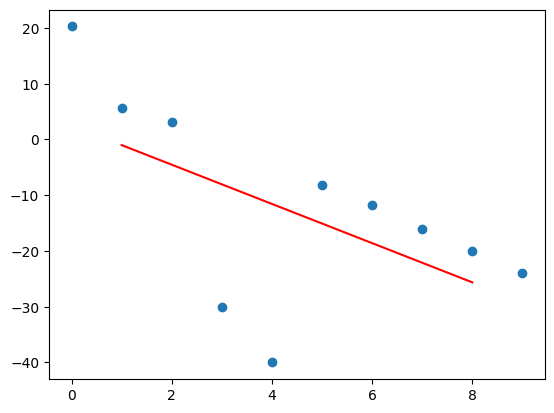

In [88]:
plt.scatter(xi, yi, label='Data Points')
x_train, x_test, y_train, y_test = train_test_split(xi,yi, test_size=0.2, random_state = 42)
print(x_train)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1, 1), y_train)
y_predicts = regressor.predict(x_test.reshape(-1, 1))
plt.plot(x_test.reshape(-1, 1), y_predicts, color = 'r')
# Plot the linear regression line
#plt.plot(xi, y_pred, color='red', label=f'Linear Regression\ny = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

# # Add labels and legend
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()

# # Show the plot
# plt.title('Scatter Plot with Linear Regression (Using DataFrame)')
# plt.grid(True)
# plt.show()
# y